# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [20]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

In [21]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot
import numpy as np 
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
mnist_images.shape
print ('max:{}'.format(np.max(mnist_images[0])))
print ('max:{}'.format(np.min(mnist_images[0])))
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
img1 = [next(mnist_dataset.get_batches(5)) for i in range(3)]
print('len:{}'.format(len(img1)))
print ('max:{}'.format(np.max(img1[0])))
print ('max:{}'.format(np.min(img1[0])))

if 0:
    for img2 in mnist_dataset.get_batches(5):
        img2 *= 2
        print('len:{}'.format(len(img2)))
        print ('max:{}'.format(np.max(img2[0])))
        print ('max:{}'.format(np.min(img2[0])))
    
#pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

max:255.0
max:0.0
len:3
max:0.5
max:-0.5
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
max:-1.0
len:5
max:1.0
ma

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

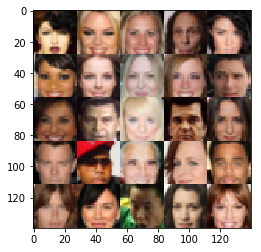

In [22]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [24]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32,shape=(None, image_width, image_height, image_channels))
    tensor_z = tf.placeholder(tf.float32, shape=(None,z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return real_input, tensor_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [25]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    is_train=True
    with tf.variable_scope('discriminator', reuse=reuse) as scope:
        alpha = 0.2
        x = tf.layers.conv2d(images,32,(5,5),strides=(2,2), activation=None, padding='same')
        x = tf.maximum(alpha*x,x)
        # x is 14X14X32
        x = tf.layers.conv2d(x,64,(5,5),strides=(2,2), activation=None, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x,x)
        # x is 7X7X64
        x = tf.layers.conv2d(x,128,(5,5),strides=(2,2), activation=None, padding='same')
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(alpha*x,x)
        # x is 4X4X128

        flat = tf.reshape(x, (-1, 4*4*128))
        logits = tf.layers.dense(flat,1)
        out = tf.nn.sigmoid(logits) 
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [26]:
def generator(z, out_channel_dim, is_train=True, reuse=False):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha = 0.2
    in_channels = 1024
    with tf.variable_scope('generator', reuse= (not is_train)) as scope:
        # TODO: Implement Function
        # z is a one dimensional random vector
        x = tf.layers.dense(z, 4*4*in_channels)
        x = tf.reshape(x,(-1, 4, 4, in_channels))
        x = tf.layers.batch_normalization(x, training=is_train, center=False, scale=False)
        x = tf.maximum(alpha*x, x)
        # 4*4*in_channels
        
        if 0:
            x = tf.layers.conv2d_transpose(x, int(in_channels/2), (4,4),(1,1),padding='valid')
            # this will give 7x7 stride 1 and padding valid (use normal convolution formula to go backward)
            x = tf.layers.batch_normalization(x,training=is_train,  center=False, scale=False)
            x1 = tf.maximum(alpha*x, x)
        else:
            x = tf.layers.conv2d_transpose(x, int(in_channels/2), (5,5),(2,2),padding='same')
            # this will give 7x7 stride 1 and padding valid (use normal convolution formula to go backward)
            x = tf.layers.batch_normalization(x,training=is_train,  center=False, scale=False)
            x1 = tf.maximum(alpha*x, x)
            # 8*8*in_channels/2 - 512 (for in_channel 1024)
            x1 = tf.slice(x,[0,1,1,0],[-1,-1,-1,-1])
            # 7*7*in_channels/2
            
        if 1:
            x1 = tf.layers.conv2d_transpose(x1,int(in_channels/4),(5,5),(2,2),padding='same')
            x1 = tf.layers.batch_normalization(x1,training=is_train, center=False, scale=False)
            x1 = tf.maximum(alpha*x1, x1)
            # 14*14*in_channels/4  - 256 (for in_channel 1024)

            if in_channels > 512:
                # if in_channels were > 512 we need extra layer to go down
                x1 = tf.layers.conv2d_transpose(x1,int(in_channels/8),(5,5),(2,2),padding='same')
                x1 = tf.layers.batch_normalization(x1,training=is_train,  center=False, scale=False)
                x1 = tf.maximum(alpha*x1, x1)
                x1 = tf.layers.conv2d_transpose(x1, out_channel_dim,(5,5),(1,1),padding='same')
                # 28*28*in_channels/8  - 128 (for in_channel 1024)
            else:
                x1 = tf.layers.conv2d_transpose(x1, out_channel_dim,(5,5),(2,2),padding='same')
                # 28X28* 128

        out = tf.tanh(x1)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [27]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    real_out, real_logits = discriminator(input_real, reuse=False)
    fake_image = generator(input_z, out_channel_dim, reuse=False)
    fake_out, fake_logits = discriminator(fake_image, reuse=True)
    smooth = 0.9
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = real_logits, labels = tf.ones_like(real_logits)*smooth))
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_logits, labels = tf.zeros_like(fake_logits)))
    d_loss = d_real_loss + d_fake_loss
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = fake_logits, labels = tf.ones_like(fake_logits)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [28]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate/2, beta1=beta1).minimize(d_loss,var_list = d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss,var_list = g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [30]:
import pickle as pkl 
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    ckpt_dir = './checkpoint'
    if not os.path.exists(ckpt_dir):
        os.makedirs(ckpt_dir)

    show_every = 50 # show every 1000 iter
    num_train_examples = data_shape[0]
    image_width = data_shape[1]
    image_height = data_shape[2]
    image_channels = data_shape[3]
    sample_z = np.random.uniform(-1,1,size=(batch_size,z_dim))

    # defined the net here
    input_real, input_z, learning_rate_ph = model_inputs(image_width, image_height, image_channels,z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels )
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate_ph, beta1)

    saver = tf.train.Saver()
    counter = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        #samples = sess.run(generator(input_z, image_channels, False), feed_dict={input_z:np.random.uniform(-1, 1, size=[batch_size, z_dim])})
        # images1 = next(get_batches(batch_size))
        # samples = sess.run(discriminator(input_real,True), feed_dict={input_real:images1})
        for epoch_i in range(epoch_count):
            generated_sample_list = []
            for iter, batch_images in enumerate(get_batches(batch_size)):
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                counter +=1
                batch_images *= 2 
                # TODO: Train Model
                if iter % 1 == 0:
                    _, d_loss_val = sess.run([d_train_opt, d_loss],feed_dict =
                                             {input_real:batch_images,
                                              input_z: batch_z,
                                             learning_rate_ph:learning_rate})

                _, g_loss_val = sess.run([g_train_opt, g_loss],feed_dict={input_real:batch_images,
                                                  input_z: batch_z,
                                                  learning_rate_ph:learning_rate})
                if counter % 10 == 0:
                    print ('epoch:{} iter:{} counter:{} d_loss:{} g_loss:{}'.format(epoch_i, iter, counter, d_loss_val, g_loss_val))

                if show_every > 0 and counter % show_every == 0:
                    n_images = 25
                    generated_samples = show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)
                    generated_sample_list.append((epoch_i, counter, generated_samples))

            ckpt = '{}/generator_epoch_{}.ckpt'.format(ckpt_dir,epoch_i)
            saver.save(sess, ckpt)
            with open('samples{}.pkl'.format(epoch_i), 'wb') as fp:
                pkl.dump(generated_sample_list,fp)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

epoch:0 iter:9 counter:10 d_loss:2.6043803691864014 g_loss:0.7073370814323425
epoch:0 iter:19 counter:20 d_loss:0.6731379628181458 g_loss:2.854785919189453
epoch:0 iter:29 counter:30 d_loss:0.8686022758483887 g_loss:2.5332491397857666
epoch:0 iter:39 counter:40 d_loss:0.6583517789840698 g_loss:2.7476508617401123
epoch:0 iter:49 counter:50 d_loss:0.7126452922821045 g_loss:2.6308045387268066


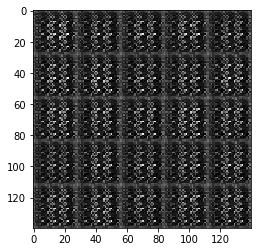

epoch:0 iter:59 counter:60 d_loss:1.0028716325759888 g_loss:2.4783082008361816
epoch:0 iter:69 counter:70 d_loss:0.7202668190002441 g_loss:2.561461925506592
epoch:0 iter:79 counter:80 d_loss:0.7392207980155945 g_loss:2.651292324066162
epoch:0 iter:89 counter:90 d_loss:1.0754598379135132 g_loss:2.7418465614318848
epoch:0 iter:99 counter:100 d_loss:1.1430716514587402 g_loss:2.295640468597412


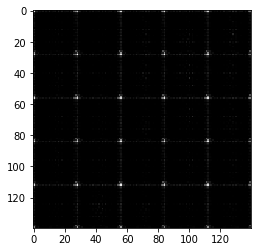

epoch:0 iter:109 counter:110 d_loss:1.014190435409546 g_loss:2.540800094604492
epoch:0 iter:119 counter:120 d_loss:1.9398597478866577 g_loss:2.01310396194458
epoch:0 iter:129 counter:130 d_loss:0.771906852722168 g_loss:2.5904669761657715
epoch:0 iter:139 counter:140 d_loss:0.7538753747940063 g_loss:2.779029369354248
epoch:0 iter:149 counter:150 d_loss:2.027952194213867 g_loss:1.7258362770080566


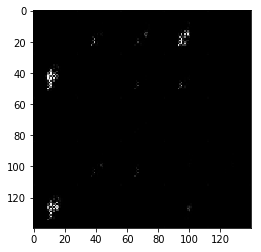

epoch:0 iter:159 counter:160 d_loss:1.0575313568115234 g_loss:1.989195704460144
epoch:0 iter:169 counter:170 d_loss:1.2799429893493652 g_loss:1.977730631828308
epoch:0 iter:179 counter:180 d_loss:0.9346292018890381 g_loss:2.240734100341797
epoch:0 iter:189 counter:190 d_loss:0.7940598130226135 g_loss:2.153413772583008
epoch:0 iter:199 counter:200 d_loss:1.4704923629760742 g_loss:1.6522094011306763


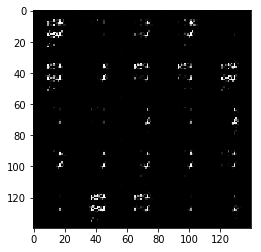

epoch:0 iter:209 counter:210 d_loss:0.9735218286514282 g_loss:1.9434359073638916
epoch:0 iter:219 counter:220 d_loss:1.1719167232513428 g_loss:1.5254871845245361
epoch:0 iter:229 counter:230 d_loss:0.9870979189872742 g_loss:1.5777921676635742
epoch:0 iter:239 counter:240 d_loss:1.0511356592178345 g_loss:1.5769240856170654
epoch:0 iter:249 counter:250 d_loss:1.353203296661377 g_loss:1.4490054845809937


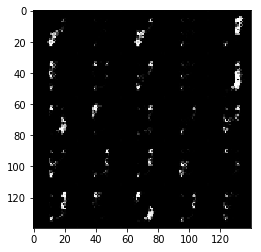

epoch:0 iter:259 counter:260 d_loss:1.0657142400741577 g_loss:1.7794229984283447
epoch:0 iter:269 counter:270 d_loss:1.2268363237380981 g_loss:1.7094590663909912
epoch:0 iter:279 counter:280 d_loss:1.257253885269165 g_loss:1.8194987773895264
epoch:0 iter:289 counter:290 d_loss:1.3216707706451416 g_loss:1.6987049579620361
epoch:0 iter:299 counter:300 d_loss:0.9391027688980103 g_loss:1.801468014717102


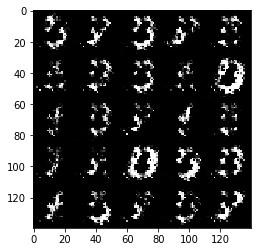

epoch:0 iter:309 counter:310 d_loss:1.7398377656936646 g_loss:0.9975306987762451
epoch:0 iter:319 counter:320 d_loss:1.452613353729248 g_loss:1.2642134428024292
epoch:0 iter:329 counter:330 d_loss:1.6922825574874878 g_loss:1.0742813348770142
epoch:0 iter:339 counter:340 d_loss:1.537635087966919 g_loss:1.0913400650024414
epoch:0 iter:349 counter:350 d_loss:1.4853649139404297 g_loss:1.1798324584960938


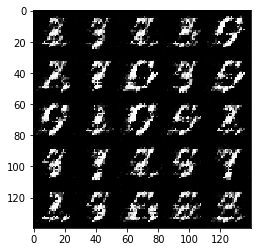

epoch:0 iter:359 counter:360 d_loss:1.5397144556045532 g_loss:1.1927162408828735
epoch:0 iter:369 counter:370 d_loss:1.3347434997558594 g_loss:1.528435468673706
epoch:0 iter:379 counter:380 d_loss:1.333397626876831 g_loss:1.4439659118652344
epoch:0 iter:389 counter:390 d_loss:1.334542989730835 g_loss:1.5082783699035645
epoch:0 iter:399 counter:400 d_loss:1.2818375825881958 g_loss:1.3302240371704102


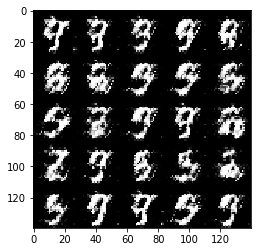

epoch:0 iter:409 counter:410 d_loss:1.2957468032836914 g_loss:1.567043662071228
epoch:0 iter:419 counter:420 d_loss:1.1778168678283691 g_loss:1.4714317321777344
epoch:0 iter:429 counter:430 d_loss:1.0291402339935303 g_loss:1.6702024936676025
epoch:0 iter:439 counter:440 d_loss:1.323221206665039 g_loss:1.2748955488204956
epoch:0 iter:449 counter:450 d_loss:1.4643442630767822 g_loss:1.292648196220398


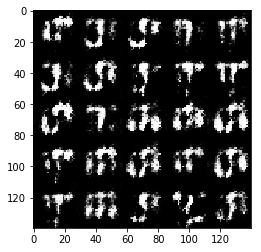

epoch:0 iter:459 counter:460 d_loss:1.4740195274353027 g_loss:1.2063242197036743
epoch:0 iter:469 counter:470 d_loss:1.0624134540557861 g_loss:1.3551249504089355
epoch:0 iter:479 counter:480 d_loss:1.556990623474121 g_loss:1.1287901401519775
epoch:0 iter:489 counter:490 d_loss:1.4356129169464111 g_loss:1.2093541622161865
epoch:0 iter:499 counter:500 d_loss:1.3640698194503784 g_loss:1.1171435117721558


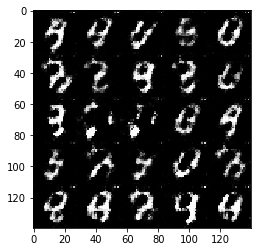

epoch:0 iter:509 counter:510 d_loss:1.3023382425308228 g_loss:1.0724596977233887
epoch:0 iter:519 counter:520 d_loss:1.3428199291229248 g_loss:1.0894296169281006
epoch:0 iter:529 counter:530 d_loss:1.4539730548858643 g_loss:0.9946609139442444
epoch:0 iter:539 counter:540 d_loss:1.3870792388916016 g_loss:0.947655975818634
epoch:0 iter:549 counter:550 d_loss:1.5530786514282227 g_loss:0.88401198387146


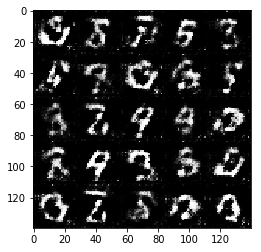

epoch:0 iter:559 counter:560 d_loss:1.3862724304199219 g_loss:0.9852340817451477
epoch:0 iter:569 counter:570 d_loss:1.4078481197357178 g_loss:0.932380199432373
epoch:0 iter:579 counter:580 d_loss:1.292372465133667 g_loss:1.1337084770202637
epoch:0 iter:589 counter:590 d_loss:1.4497311115264893 g_loss:0.985695481300354
epoch:0 iter:599 counter:600 d_loss:1.3061890602111816 g_loss:1.0416810512542725


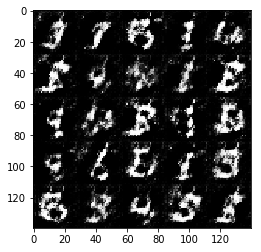

epoch:0 iter:609 counter:610 d_loss:1.5344624519348145 g_loss:0.8429803848266602
epoch:0 iter:619 counter:620 d_loss:1.2854019403457642 g_loss:1.0161590576171875
epoch:0 iter:629 counter:630 d_loss:1.4776073694229126 g_loss:0.8881603479385376
epoch:0 iter:639 counter:640 d_loss:1.4628866910934448 g_loss:0.9279732704162598
epoch:0 iter:649 counter:650 d_loss:1.4752657413482666 g_loss:0.9366641044616699


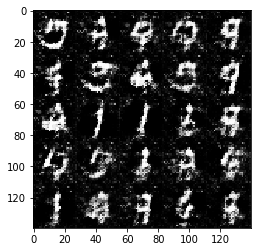

epoch:0 iter:659 counter:660 d_loss:1.3507986068725586 g_loss:1.02476167678833
epoch:0 iter:669 counter:670 d_loss:1.5341475009918213 g_loss:0.8948869705200195
epoch:0 iter:679 counter:680 d_loss:1.463571310043335 g_loss:0.8909624814987183
epoch:0 iter:689 counter:690 d_loss:1.4513847827911377 g_loss:0.9434283971786499
epoch:0 iter:699 counter:700 d_loss:1.3613317012786865 g_loss:0.9241230487823486


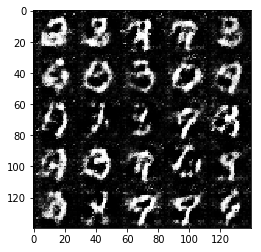

epoch:0 iter:709 counter:710 d_loss:1.519256830215454 g_loss:0.8423281908035278
epoch:0 iter:719 counter:720 d_loss:1.4460786581039429 g_loss:0.8793186545372009
epoch:0 iter:729 counter:730 d_loss:1.4248130321502686 g_loss:0.8696513175964355
epoch:0 iter:739 counter:740 d_loss:1.460360050201416 g_loss:0.8314178586006165
epoch:0 iter:749 counter:750 d_loss:1.407524824142456 g_loss:0.8988973498344421


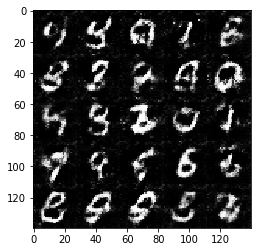

epoch:0 iter:759 counter:760 d_loss:1.464269757270813 g_loss:0.8028594851493835
epoch:0 iter:769 counter:770 d_loss:1.3902547359466553 g_loss:0.8701674938201904
epoch:0 iter:779 counter:780 d_loss:1.3951778411865234 g_loss:0.8470967411994934
epoch:0 iter:789 counter:790 d_loss:1.408056378364563 g_loss:0.8279305100440979
epoch:0 iter:799 counter:800 d_loss:1.4166185855865479 g_loss:0.8347477912902832


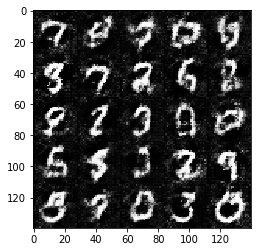

epoch:0 iter:809 counter:810 d_loss:1.353020429611206 g_loss:0.8734907507896423
epoch:0 iter:819 counter:820 d_loss:1.3827245235443115 g_loss:0.8516970872879028
epoch:0 iter:829 counter:830 d_loss:1.394031286239624 g_loss:0.8565183877944946
epoch:0 iter:839 counter:840 d_loss:1.4349398612976074 g_loss:0.8159592151641846
epoch:0 iter:849 counter:850 d_loss:1.4254926443099976 g_loss:0.8373975157737732


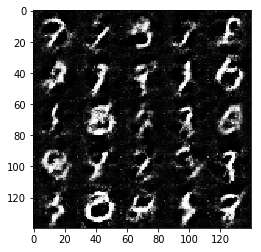

epoch:0 iter:859 counter:860 d_loss:1.3998031616210938 g_loss:0.866993248462677
epoch:0 iter:869 counter:870 d_loss:1.3939735889434814 g_loss:0.8458611369132996
epoch:0 iter:879 counter:880 d_loss:1.4047044515609741 g_loss:0.8413195013999939
epoch:0 iter:889 counter:890 d_loss:1.4275219440460205 g_loss:0.7978017330169678
epoch:0 iter:899 counter:900 d_loss:1.4278700351715088 g_loss:0.8323860764503479


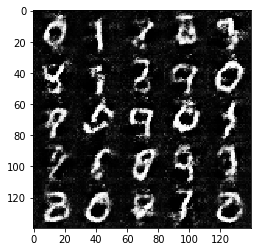

epoch:0 iter:909 counter:910 d_loss:1.4570800065994263 g_loss:0.8124769926071167
epoch:0 iter:919 counter:920 d_loss:1.420073390007019 g_loss:0.8195434212684631
epoch:0 iter:929 counter:930 d_loss:1.422245740890503 g_loss:0.8147663474082947
epoch:1 iter:2 counter:940 d_loss:1.3595445156097412 g_loss:0.8444600701332092
epoch:1 iter:12 counter:950 d_loss:1.4120619297027588 g_loss:0.8119329214096069


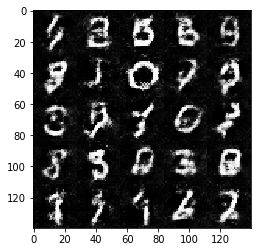

epoch:1 iter:22 counter:960 d_loss:1.3517197370529175 g_loss:0.8819794654846191
epoch:1 iter:32 counter:970 d_loss:1.3893823623657227 g_loss:0.8150427341461182
epoch:1 iter:42 counter:980 d_loss:1.4183952808380127 g_loss:0.8466527462005615
epoch:1 iter:52 counter:990 d_loss:1.3623652458190918 g_loss:0.8593090772628784
epoch:1 iter:62 counter:1000 d_loss:1.391289472579956 g_loss:0.8362470865249634


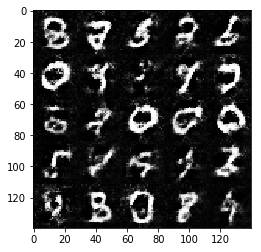

epoch:1 iter:72 counter:1010 d_loss:1.3728710412979126 g_loss:0.8685275912284851
epoch:1 iter:82 counter:1020 d_loss:1.3852771520614624 g_loss:0.8830429315567017
epoch:1 iter:92 counter:1030 d_loss:1.3994176387786865 g_loss:0.8520840406417847
epoch:1 iter:102 counter:1040 d_loss:1.4011462926864624 g_loss:0.8392139673233032
epoch:1 iter:112 counter:1050 d_loss:1.3973033428192139 g_loss:0.8894871473312378


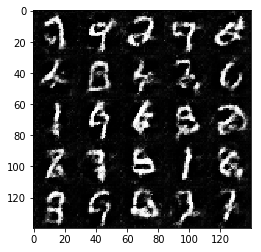

epoch:1 iter:122 counter:1060 d_loss:1.4058998823165894 g_loss:0.8401275873184204
epoch:1 iter:132 counter:1070 d_loss:1.3436031341552734 g_loss:0.8844334483146667
epoch:1 iter:142 counter:1080 d_loss:1.437227725982666 g_loss:0.7825190424919128
epoch:1 iter:152 counter:1090 d_loss:1.3962209224700928 g_loss:0.8651660680770874
epoch:1 iter:162 counter:1100 d_loss:1.4112216234207153 g_loss:0.7913098335266113


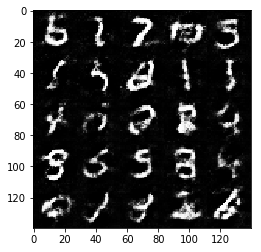

epoch:1 iter:172 counter:1110 d_loss:1.440219759941101 g_loss:0.8496593832969666
epoch:1 iter:182 counter:1120 d_loss:1.3907411098480225 g_loss:0.8557425141334534
epoch:1 iter:192 counter:1130 d_loss:1.3860106468200684 g_loss:0.80706787109375
epoch:1 iter:202 counter:1140 d_loss:1.3916285037994385 g_loss:0.862383246421814
epoch:1 iter:212 counter:1150 d_loss:1.3747670650482178 g_loss:0.8348750472068787


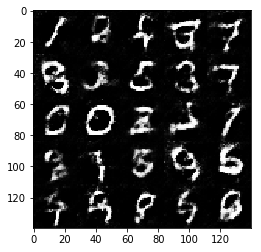

epoch:1 iter:222 counter:1160 d_loss:1.3791837692260742 g_loss:0.8603938221931458
epoch:1 iter:232 counter:1170 d_loss:1.4054334163665771 g_loss:0.8463438749313354
epoch:1 iter:242 counter:1180 d_loss:1.36589777469635 g_loss:0.8345335721969604
epoch:1 iter:252 counter:1190 d_loss:1.3769280910491943 g_loss:0.906844437122345
epoch:1 iter:262 counter:1200 d_loss:1.371201515197754 g_loss:0.8631576299667358


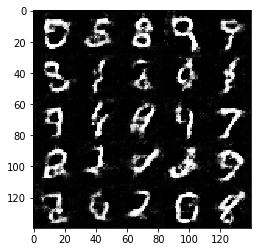

epoch:1 iter:272 counter:1210 d_loss:1.3641576766967773 g_loss:0.8833567500114441
epoch:1 iter:282 counter:1220 d_loss:1.40064537525177 g_loss:0.8553090691566467
epoch:1 iter:292 counter:1230 d_loss:1.3546454906463623 g_loss:0.904666543006897
epoch:1 iter:302 counter:1240 d_loss:1.4030731916427612 g_loss:0.8539175391197205
epoch:1 iter:312 counter:1250 d_loss:1.3988556861877441 g_loss:0.8157107830047607


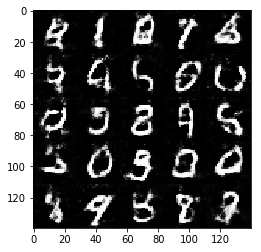

epoch:1 iter:322 counter:1260 d_loss:1.3864963054656982 g_loss:0.8290652632713318
epoch:1 iter:332 counter:1270 d_loss:1.369433045387268 g_loss:0.8247036337852478
epoch:1 iter:342 counter:1280 d_loss:1.393117904663086 g_loss:0.8417221307754517
epoch:1 iter:352 counter:1290 d_loss:1.3563785552978516 g_loss:0.8307306170463562
epoch:1 iter:362 counter:1300 d_loss:1.3510770797729492 g_loss:0.8248661756515503


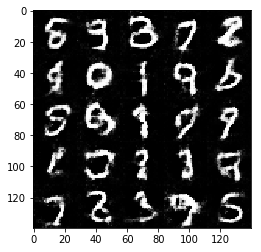

epoch:1 iter:372 counter:1310 d_loss:1.4054923057556152 g_loss:0.8942922949790955
epoch:1 iter:382 counter:1320 d_loss:1.4068220853805542 g_loss:0.8417433500289917
epoch:1 iter:392 counter:1330 d_loss:1.3844338655471802 g_loss:0.8368916511535645
epoch:1 iter:402 counter:1340 d_loss:1.3579399585723877 g_loss:0.896927535533905
epoch:1 iter:412 counter:1350 d_loss:1.4349277019500732 g_loss:0.7815789580345154


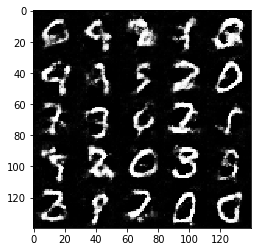

epoch:1 iter:422 counter:1360 d_loss:1.367263913154602 g_loss:0.8534308671951294
epoch:1 iter:432 counter:1370 d_loss:1.3481130599975586 g_loss:0.868274986743927
epoch:1 iter:442 counter:1380 d_loss:1.377375602722168 g_loss:0.857066810131073
epoch:1 iter:452 counter:1390 d_loss:1.4138892889022827 g_loss:0.8109070062637329
epoch:1 iter:462 counter:1400 d_loss:1.3791048526763916 g_loss:0.8404936790466309


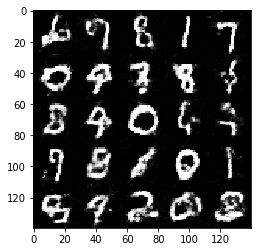

epoch:1 iter:472 counter:1410 d_loss:1.3910565376281738 g_loss:0.8056504130363464
epoch:1 iter:482 counter:1420 d_loss:1.3587775230407715 g_loss:0.8308604955673218
epoch:1 iter:492 counter:1430 d_loss:1.406233310699463 g_loss:0.8162246346473694
epoch:1 iter:502 counter:1440 d_loss:1.3997557163238525 g_loss:0.8328211903572083
epoch:1 iter:512 counter:1450 d_loss:1.421100378036499 g_loss:0.7999550104141235


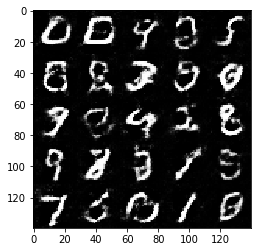

epoch:1 iter:522 counter:1460 d_loss:1.3699464797973633 g_loss:0.8388986587524414
epoch:1 iter:532 counter:1470 d_loss:1.3945056200027466 g_loss:0.8466349840164185
epoch:1 iter:542 counter:1480 d_loss:1.3495173454284668 g_loss:0.8804241418838501
epoch:1 iter:552 counter:1490 d_loss:1.3570088148117065 g_loss:0.8113471269607544
epoch:1 iter:562 counter:1500 d_loss:1.37186598777771 g_loss:0.8715531826019287


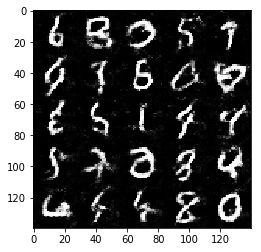

epoch:1 iter:572 counter:1510 d_loss:1.4083034992218018 g_loss:0.806842029094696
epoch:1 iter:582 counter:1520 d_loss:1.3745105266571045 g_loss:0.8444733619689941
epoch:1 iter:592 counter:1530 d_loss:1.3794972896575928 g_loss:0.8358374238014221
epoch:1 iter:602 counter:1540 d_loss:1.3664426803588867 g_loss:0.8606623411178589
epoch:1 iter:612 counter:1550 d_loss:1.3859318494796753 g_loss:0.8633087873458862


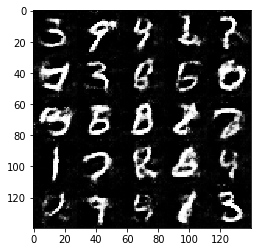

epoch:1 iter:622 counter:1560 d_loss:1.3771374225616455 g_loss:0.8650714159011841
epoch:1 iter:632 counter:1570 d_loss:1.3683185577392578 g_loss:0.8383353352546692
epoch:1 iter:642 counter:1580 d_loss:1.4184393882751465 g_loss:0.8491581678390503
epoch:1 iter:652 counter:1590 d_loss:1.3548163175582886 g_loss:0.8866521120071411
epoch:1 iter:662 counter:1600 d_loss:1.406718134880066 g_loss:0.8115636706352234


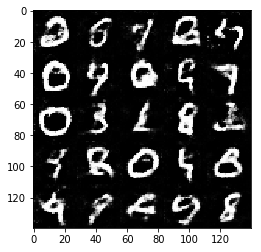

epoch:1 iter:672 counter:1610 d_loss:1.361536979675293 g_loss:0.8518241047859192
epoch:1 iter:682 counter:1620 d_loss:1.317262887954712 g_loss:0.9397490620613098
epoch:1 iter:692 counter:1630 d_loss:1.3464398384094238 g_loss:0.868147075176239
epoch:1 iter:702 counter:1640 d_loss:1.3793132305145264 g_loss:0.8361676931381226
epoch:1 iter:712 counter:1650 d_loss:1.3504104614257812 g_loss:0.8634546399116516


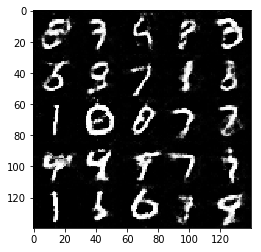

epoch:1 iter:722 counter:1660 d_loss:1.372430682182312 g_loss:0.8297044634819031
epoch:1 iter:732 counter:1670 d_loss:1.3637795448303223 g_loss:0.8739539384841919
epoch:1 iter:742 counter:1680 d_loss:1.356130838394165 g_loss:0.837714433670044
epoch:1 iter:752 counter:1690 d_loss:1.4091036319732666 g_loss:0.8021379113197327
epoch:1 iter:762 counter:1700 d_loss:1.3724374771118164 g_loss:0.8293905258178711


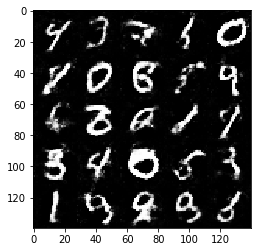

epoch:1 iter:772 counter:1710 d_loss:1.3669543266296387 g_loss:0.9016916751861572
epoch:1 iter:782 counter:1720 d_loss:1.36151921749115 g_loss:0.8762869238853455
epoch:1 iter:792 counter:1730 d_loss:1.4095115661621094 g_loss:0.8273271918296814
epoch:1 iter:802 counter:1740 d_loss:1.411566972732544 g_loss:0.8413615226745605
epoch:1 iter:812 counter:1750 d_loss:1.313807487487793 g_loss:0.876721978187561


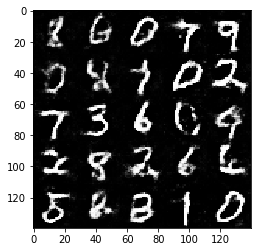

epoch:1 iter:822 counter:1760 d_loss:1.3852920532226562 g_loss:0.8334054946899414
epoch:1 iter:832 counter:1770 d_loss:1.3660380840301514 g_loss:0.8504051566123962
epoch:1 iter:842 counter:1780 d_loss:1.3625388145446777 g_loss:0.8554873466491699
epoch:1 iter:852 counter:1790 d_loss:1.3647925853729248 g_loss:0.855116605758667
epoch:1 iter:862 counter:1800 d_loss:1.3717347383499146 g_loss:0.8843180537223816


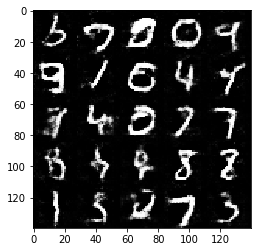

epoch:1 iter:872 counter:1810 d_loss:1.4002885818481445 g_loss:0.8155545592308044
epoch:1 iter:882 counter:1820 d_loss:1.3691842555999756 g_loss:0.8379921317100525
epoch:1 iter:892 counter:1830 d_loss:1.3452274799346924 g_loss:0.9386080503463745
epoch:1 iter:902 counter:1840 d_loss:1.380934715270996 g_loss:0.845780611038208
epoch:1 iter:912 counter:1850 d_loss:1.4055030345916748 g_loss:0.838066577911377


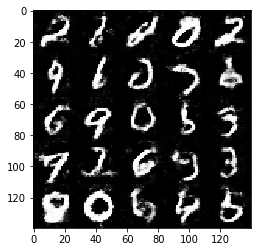

epoch:1 iter:922 counter:1860 d_loss:1.338167667388916 g_loss:0.8768913745880127
epoch:1 iter:932 counter:1870 d_loss:1.3736770153045654 g_loss:0.8066034913063049


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    
    

In [ ]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

In [ ]:
60000//128

In [ ]:
mnist_dataset.shape
dd = mnist_dataset.get_batches(1)
dd[0].shape

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

In [ ]:
celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
img1 = next(celeba_dataset.get_batches(5))
print ('max:{}'.format(np.max(img1[0])))
print ('max:{}'.format(np.min(img1[0])))


epoch:0 iter:9 counter:10 d_loss:6.5159173011779785 g_loss:0.021373914554715157
epoch:0 iter:19 counter:20 d_loss:5.110813140869141 g_loss:0.13431602716445923
epoch:0 iter:29 counter:30 d_loss:1.7916165590286255 g_loss:1.685746192932129
epoch:0 iter:39 counter:40 d_loss:3.2825779914855957 g_loss:0.7758361101150513
epoch:0 iter:49 counter:50 d_loss:2.4593636989593506 g_loss:1.1190428733825684


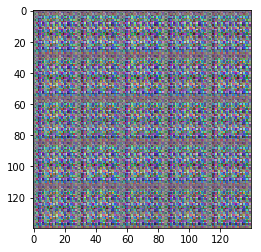

epoch:0 iter:59 counter:60 d_loss:2.508714437484741 g_loss:1.202951431274414
epoch:0 iter:69 counter:70 d_loss:1.8385655879974365 g_loss:1.595707654953003
epoch:0 iter:79 counter:80 d_loss:2.0975587368011475 g_loss:1.5533276796340942
epoch:0 iter:89 counter:90 d_loss:2.0116212368011475 g_loss:1.557363510131836
epoch:0 iter:99 counter:100 d_loss:1.7173305749893188 g_loss:1.8400815725326538


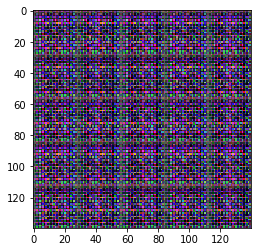

epoch:0 iter:109 counter:110 d_loss:1.5998964309692383 g_loss:1.7052615880966187
epoch:0 iter:119 counter:120 d_loss:1.4216315746307373 g_loss:1.8412654399871826
epoch:0 iter:129 counter:130 d_loss:1.1445308923721313 g_loss:1.882852554321289
epoch:0 iter:139 counter:140 d_loss:1.2934770584106445 g_loss:1.856774091720581
epoch:0 iter:149 counter:150 d_loss:1.0779609680175781 g_loss:1.9755630493164062


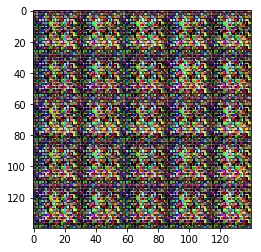

epoch:0 iter:159 counter:160 d_loss:1.1733208894729614 g_loss:1.7713054418563843
epoch:0 iter:169 counter:170 d_loss:1.3688979148864746 g_loss:1.717266321182251
epoch:0 iter:179 counter:180 d_loss:1.641558289527893 g_loss:1.7177257537841797
epoch:0 iter:189 counter:190 d_loss:1.467191457748413 g_loss:1.8474351167678833
epoch:0 iter:199 counter:200 d_loss:1.0711818933486938 g_loss:1.9760587215423584


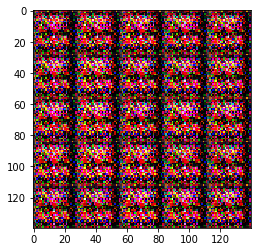

epoch:0 iter:209 counter:210 d_loss:0.941899836063385 g_loss:2.204448699951172
epoch:0 iter:219 counter:220 d_loss:1.1724340915679932 g_loss:1.9654216766357422
epoch:0 iter:229 counter:230 d_loss:0.9325031638145447 g_loss:2.1320204734802246
epoch:0 iter:239 counter:240 d_loss:0.922385036945343 g_loss:2.2322998046875
epoch:0 iter:249 counter:250 d_loss:0.9424875378608704 g_loss:2.2348904609680176


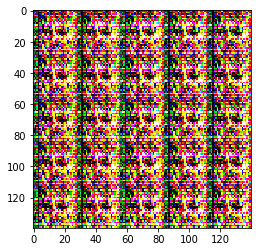

epoch:0 iter:259 counter:260 d_loss:0.9211313724517822 g_loss:2.3313448429107666
epoch:0 iter:269 counter:270 d_loss:0.8954122066497803 g_loss:2.107983112335205
epoch:0 iter:279 counter:280 d_loss:0.8026943206787109 g_loss:2.32722544670105
epoch:0 iter:289 counter:290 d_loss:0.5888627767562866 g_loss:2.5680572986602783
epoch:0 iter:299 counter:300 d_loss:0.9414839744567871 g_loss:2.2083740234375


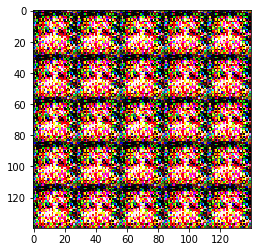

epoch:0 iter:309 counter:310 d_loss:1.2374436855316162 g_loss:1.8131921291351318
epoch:0 iter:319 counter:320 d_loss:1.0233638286590576 g_loss:2.080528497695923
epoch:0 iter:329 counter:330 d_loss:0.7750107049942017 g_loss:2.2829127311706543
epoch:0 iter:339 counter:340 d_loss:0.9964195489883423 g_loss:2.338989734649658
epoch:0 iter:349 counter:350 d_loss:0.6645215153694153 g_loss:2.5686116218566895


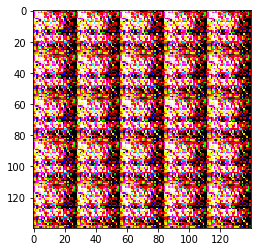

epoch:0 iter:359 counter:360 d_loss:0.6780208349227905 g_loss:2.4675474166870117
epoch:0 iter:369 counter:370 d_loss:0.6373611688613892 g_loss:2.557635545730591
epoch:0 iter:379 counter:380 d_loss:0.7912992835044861 g_loss:2.3627195358276367
epoch:0 iter:389 counter:390 d_loss:0.7427188158035278 g_loss:2.4160990715026855
epoch:0 iter:399 counter:400 d_loss:0.6525022983551025 g_loss:2.4239280223846436


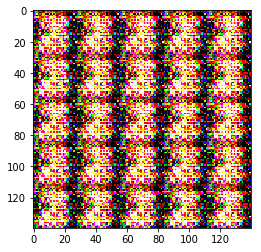

epoch:0 iter:409 counter:410 d_loss:0.8514310717582703 g_loss:2.178661346435547
epoch:0 iter:419 counter:420 d_loss:0.9874399900436401 g_loss:2.1345226764678955
epoch:0 iter:429 counter:430 d_loss:0.758752703666687 g_loss:2.3535478115081787
epoch:0 iter:439 counter:440 d_loss:0.7139332294464111 g_loss:2.40440034866333
epoch:0 iter:449 counter:450 d_loss:0.7002276182174683 g_loss:2.3829803466796875


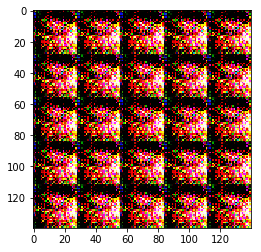

epoch:0 iter:459 counter:460 d_loss:0.5686832666397095 g_loss:2.8126959800720215
epoch:0 iter:469 counter:470 d_loss:0.5218268632888794 g_loss:2.8382856845855713
epoch:0 iter:479 counter:480 d_loss:0.5315422415733337 g_loss:2.956789255142212
epoch:0 iter:489 counter:490 d_loss:0.6986806988716125 g_loss:2.5226638317108154
epoch:0 iter:499 counter:500 d_loss:0.720941960811615 g_loss:2.49641752243042


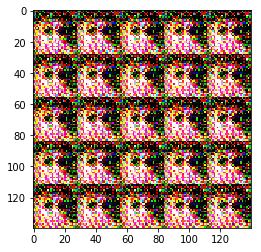

epoch:0 iter:509 counter:510 d_loss:0.7721590995788574 g_loss:2.5039026737213135
epoch:0 iter:519 counter:520 d_loss:0.7202272415161133 g_loss:2.285881996154785
epoch:0 iter:529 counter:530 d_loss:0.9270102977752686 g_loss:2.2768874168395996
epoch:0 iter:539 counter:540 d_loss:0.8358094692230225 g_loss:2.713225841522217
epoch:0 iter:549 counter:550 d_loss:0.7398766279220581 g_loss:2.4964094161987305


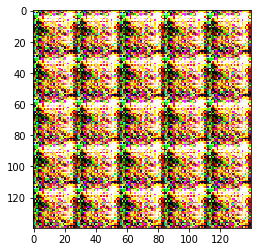

epoch:0 iter:559 counter:560 d_loss:0.7212414741516113 g_loss:2.626415729522705
epoch:0 iter:569 counter:570 d_loss:0.6458260416984558 g_loss:2.5362870693206787
epoch:0 iter:579 counter:580 d_loss:0.5482015013694763 g_loss:2.6072235107421875
epoch:0 iter:589 counter:590 d_loss:0.7761962413787842 g_loss:2.4526894092559814
epoch:0 iter:599 counter:600 d_loss:1.0203312635421753 g_loss:2.0727040767669678


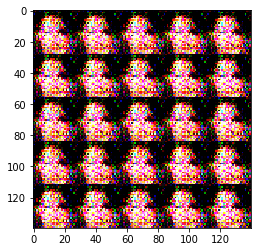

epoch:0 iter:609 counter:610 d_loss:0.8621314764022827 g_loss:2.0738143920898438
epoch:0 iter:619 counter:620 d_loss:0.8827025890350342 g_loss:1.8719353675842285
epoch:0 iter:629 counter:630 d_loss:0.7046688199043274 g_loss:2.632012367248535
epoch:0 iter:639 counter:640 d_loss:0.6367838382720947 g_loss:2.649449586868286
epoch:0 iter:649 counter:650 d_loss:0.6724823713302612 g_loss:2.724959373474121


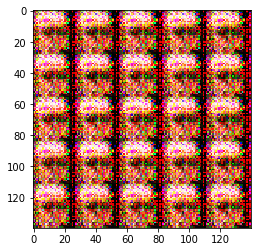

epoch:0 iter:659 counter:660 d_loss:0.6318472623825073 g_loss:2.5851874351501465
epoch:0 iter:669 counter:670 d_loss:0.7092412710189819 g_loss:2.5569610595703125
epoch:0 iter:679 counter:680 d_loss:0.8447169065475464 g_loss:2.369443655014038
epoch:0 iter:689 counter:690 d_loss:0.8638225793838501 g_loss:2.2030251026153564
epoch:0 iter:699 counter:700 d_loss:1.1778669357299805 g_loss:2.4742751121520996


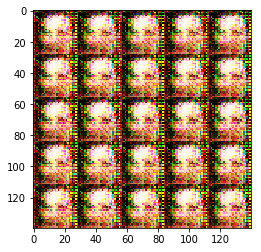

epoch:0 iter:709 counter:710 d_loss:0.6040294170379639 g_loss:2.629533290863037
epoch:0 iter:719 counter:720 d_loss:0.657875120639801 g_loss:2.654639720916748
epoch:0 iter:729 counter:730 d_loss:0.6400091648101807 g_loss:2.6284170150756836
epoch:0 iter:739 counter:740 d_loss:0.5834152698516846 g_loss:2.984896183013916
epoch:0 iter:749 counter:750 d_loss:0.5107343196868896 g_loss:3.0037012100219727


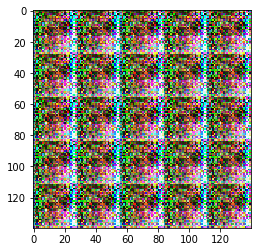

epoch:0 iter:759 counter:760 d_loss:0.6302749514579773 g_loss:3.0675759315490723
epoch:0 iter:769 counter:770 d_loss:0.9602097272872925 g_loss:2.248929500579834
epoch:0 iter:779 counter:780 d_loss:0.7021604776382446 g_loss:2.2722935676574707
epoch:0 iter:789 counter:790 d_loss:0.6080589294433594 g_loss:2.366943836212158
epoch:0 iter:799 counter:800 d_loss:0.6522951722145081 g_loss:2.4560930728912354


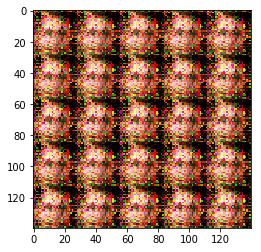

epoch:0 iter:809 counter:810 d_loss:0.6370096206665039 g_loss:2.3629369735717773
epoch:0 iter:819 counter:820 d_loss:0.7077828645706177 g_loss:2.402235984802246
epoch:0 iter:829 counter:830 d_loss:0.8032001256942749 g_loss:2.1466023921966553
epoch:0 iter:839 counter:840 d_loss:0.5389809608459473 g_loss:2.586639881134033
epoch:0 iter:849 counter:850 d_loss:0.559876024723053 g_loss:2.709874153137207


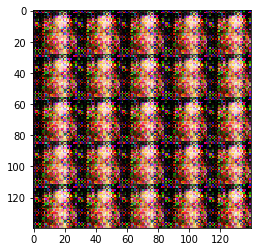

epoch:0 iter:859 counter:860 d_loss:0.8965898752212524 g_loss:2.5724709033966064
epoch:0 iter:869 counter:870 d_loss:0.6219677329063416 g_loss:2.5282304286956787
epoch:0 iter:879 counter:880 d_loss:0.5924821496009827 g_loss:2.426419734954834
epoch:0 iter:889 counter:890 d_loss:0.7128259539604187 g_loss:2.4704766273498535
epoch:0 iter:899 counter:900 d_loss:1.5908207893371582 g_loss:1.059955358505249


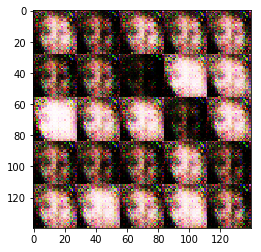

epoch:0 iter:909 counter:910 d_loss:1.7292464971542358 g_loss:0.8202457427978516
epoch:0 iter:919 counter:920 d_loss:1.976377248764038 g_loss:0.7297626733779907
epoch:0 iter:929 counter:930 d_loss:1.8693126440048218 g_loss:0.6923812031745911
epoch:0 iter:939 counter:940 d_loss:1.8619287014007568 g_loss:0.725285530090332
epoch:0 iter:949 counter:950 d_loss:1.8011733293533325 g_loss:0.7017970085144043


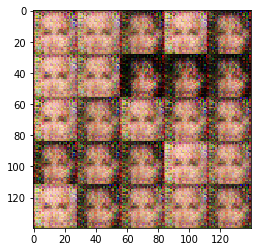

epoch:0 iter:959 counter:960 d_loss:1.6232792139053345 g_loss:0.8655234575271606
epoch:0 iter:969 counter:970 d_loss:1.163894772529602 g_loss:1.2572095394134521
epoch:0 iter:979 counter:980 d_loss:1.4874484539031982 g_loss:0.7792553901672363
epoch:0 iter:989 counter:990 d_loss:1.5773875713348389 g_loss:0.8408882021903992
epoch:0 iter:999 counter:1000 d_loss:1.4217145442962646 g_loss:0.8254835605621338


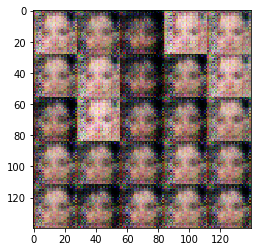

epoch:0 iter:1009 counter:1010 d_loss:1.5735712051391602 g_loss:0.861076831817627
epoch:0 iter:1019 counter:1020 d_loss:1.6426119804382324 g_loss:0.7461987733840942
epoch:0 iter:1029 counter:1030 d_loss:1.4108946323394775 g_loss:0.84617680311203
epoch:0 iter:1039 counter:1040 d_loss:1.4375680685043335 g_loss:0.9505473375320435
epoch:0 iter:1049 counter:1050 d_loss:1.4518423080444336 g_loss:0.8654090166091919


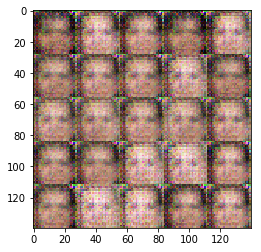

epoch:0 iter:1059 counter:1060 d_loss:1.5445886850357056 g_loss:0.9000905752182007
epoch:0 iter:1069 counter:1070 d_loss:1.0190739631652832 g_loss:1.4478251934051514
epoch:0 iter:1079 counter:1080 d_loss:1.553038239479065 g_loss:1.0618419647216797
epoch:0 iter:1089 counter:1090 d_loss:1.4010028839111328 g_loss:0.9253671169281006
epoch:0 iter:1099 counter:1100 d_loss:1.2511951923370361 g_loss:0.9344742894172668


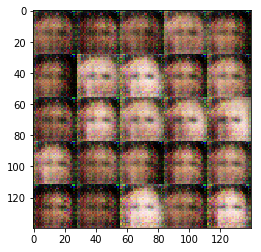

epoch:0 iter:1109 counter:1110 d_loss:1.5841625928878784 g_loss:0.8764129281044006
epoch:0 iter:1119 counter:1120 d_loss:1.8223804235458374 g_loss:0.7927920818328857
epoch:0 iter:1129 counter:1130 d_loss:1.5236871242523193 g_loss:0.7715129256248474
epoch:0 iter:1139 counter:1140 d_loss:1.69939124584198 g_loss:0.6711600422859192
epoch:0 iter:1149 counter:1150 d_loss:1.6188623905181885 g_loss:0.7258804440498352


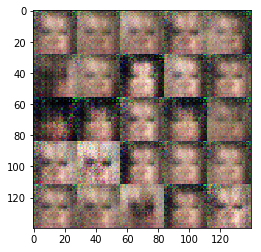

epoch:0 iter:1159 counter:1160 d_loss:1.5389716625213623 g_loss:0.7910597324371338
epoch:0 iter:1169 counter:1170 d_loss:1.5619405508041382 g_loss:0.66881263256073
epoch:0 iter:1179 counter:1180 d_loss:1.5702651739120483 g_loss:0.7226755023002625
epoch:0 iter:1189 counter:1190 d_loss:1.5722734928131104 g_loss:0.7121497392654419
epoch:0 iter:1199 counter:1200 d_loss:1.6175371408462524 g_loss:0.7116485834121704


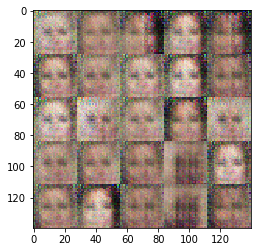

epoch:0 iter:1209 counter:1210 d_loss:1.526423692703247 g_loss:0.7153937816619873
epoch:0 iter:1219 counter:1220 d_loss:1.6307172775268555 g_loss:0.6992413997650146
epoch:0 iter:1229 counter:1230 d_loss:1.5447466373443604 g_loss:0.7048251628875732
epoch:0 iter:1239 counter:1240 d_loss:1.5436444282531738 g_loss:0.7237130403518677
epoch:0 iter:1249 counter:1250 d_loss:1.5284043550491333 g_loss:0.7221391201019287


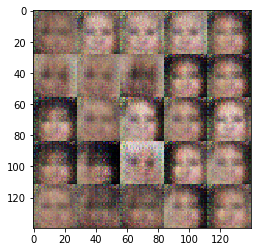

epoch:0 iter:1259 counter:1260 d_loss:1.5226831436157227 g_loss:0.7369738221168518
epoch:0 iter:1269 counter:1270 d_loss:1.5503442287445068 g_loss:0.783035397529602
epoch:0 iter:1279 counter:1280 d_loss:1.5065698623657227 g_loss:0.7258557081222534
epoch:0 iter:1289 counter:1290 d_loss:1.5294594764709473 g_loss:0.6910829544067383
epoch:0 iter:1299 counter:1300 d_loss:1.4769095182418823 g_loss:0.7605863809585571


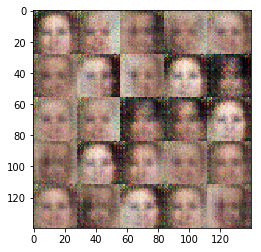

epoch:0 iter:1309 counter:1310 d_loss:1.4580230712890625 g_loss:0.773777961730957
epoch:0 iter:1319 counter:1320 d_loss:1.50592041015625 g_loss:0.74239182472229
epoch:0 iter:1329 counter:1330 d_loss:1.478013038635254 g_loss:0.7466427683830261
epoch:0 iter:1339 counter:1340 d_loss:1.5325974225997925 g_loss:0.73484206199646
epoch:0 iter:1349 counter:1350 d_loss:1.5479369163513184 g_loss:0.771287739276886


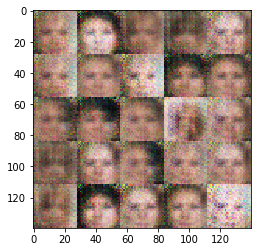

epoch:0 iter:1359 counter:1360 d_loss:1.485065221786499 g_loss:0.7930598855018616
epoch:0 iter:1369 counter:1370 d_loss:1.4796538352966309 g_loss:0.7491064071655273
epoch:0 iter:1379 counter:1380 d_loss:1.4799026250839233 g_loss:0.7672281265258789
epoch:0 iter:1389 counter:1390 d_loss:1.4556493759155273 g_loss:0.7737879753112793
epoch:0 iter:1399 counter:1400 d_loss:1.5045487880706787 g_loss:0.7650880813598633


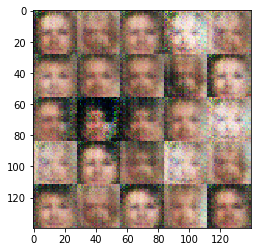

epoch:0 iter:1409 counter:1410 d_loss:1.50056791305542 g_loss:0.7740551233291626
epoch:0 iter:1419 counter:1420 d_loss:1.4943015575408936 g_loss:0.7504371404647827
epoch:0 iter:1429 counter:1430 d_loss:1.4760558605194092 g_loss:0.7593116760253906
epoch:0 iter:1439 counter:1440 d_loss:1.462386131286621 g_loss:0.792620062828064
epoch:0 iter:1449 counter:1450 d_loss:1.543849229812622 g_loss:0.7808140516281128


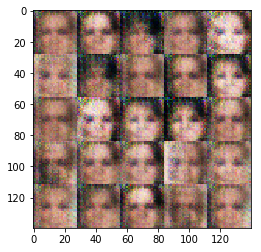

epoch:0 iter:1459 counter:1460 d_loss:1.460455298423767 g_loss:0.7446932792663574
epoch:0 iter:1469 counter:1470 d_loss:1.4882864952087402 g_loss:0.7534517049789429
epoch:0 iter:1479 counter:1480 d_loss:1.4671475887298584 g_loss:0.7774222493171692
epoch:0 iter:1489 counter:1490 d_loss:1.5093863010406494 g_loss:0.7965315580368042
epoch:0 iter:1499 counter:1500 d_loss:1.4715501070022583 g_loss:0.7654036283493042


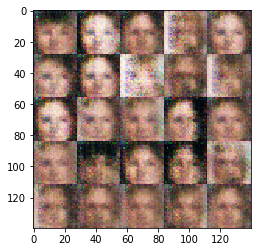

In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.